In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import*
import matplotlib as mpl
import matplotlib.image as img
from PIL import Image
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# input data file

In [2]:
df = pd.read_excel (r'data.xlsx')
df.head()

,學校編號,學年度,縣市,校名,設立別,學校類別,Enumeration_unit_lat,Enumeration_unit_long,核定班級數,現有班級數,...,語文類借閱冊次,美術類借閱冊次,圖書借閱人次,視聽資料總數,期刊報紙總類數,教職員人數,教職員借閱人次,教職員借閱冊數,附註說明,Unnamed: 43
0,1,94-2,台中市,大甲高工,公立,高職,24.347065,120.640095,36,36,...,2371,176,2124,3019,142,0,0,0,NaN,NaN
1,1,95-1,台中市,大甲高工,公立,高職,24.347065,120.640095,36,36,...,1865,324,1486,3060,133,0,0,0,本校原已於規定之時限內填報，惟未做確認動作，直至今(5/15)重新查看，才發現之前所傳未成功...,NaN
2,1,96-1,台中市,大甲高工,公立,高職,24.347065,120.640095,36,36,...,2054,196,1181,3359,120,0,0,0,NaN,NaN
3,1,96-2,台中市,大甲高工,公立,高職,24.347065,120.640095,36,36,...,1879,103,1220,3201,124,0,0,0,NaN,NaN
4,1,97-1,台中市,大甲高工,公立,高職,24.347065,120.640095,36,36,...,2288,155,1308,3467,51,0,0,0,原各類圖書資料中包含有視聽資料，經業務檢查指導更正。,NaN


In [3]:
df.columns

Index(['學校編號', '學年度', '縣市', '校名', '設立別', '學校類別', 'Enumeration_unit_lat',
       'Enumeration_unit_long', '核定班級數', '現有班級數', '現有學生數', '現有閱覽座位', '圖書館員工數',
       '主任人數', '組長人數', '職員(含工友)', '書籍冊數', '總類', '哲學類', '宗教類', '自然科學類', '應用科學類',
       '社會科學類', '史地類', '語文類', '美術類', '圖書借閱冊次', '總類借閱冊次', '哲學類借閱冊次', '宗教類借閱冊次',
       '自然科學類借閱冊次', '應用科學類借閱冊次', '社會科學類借閱冊次', '史地類借閱冊次', '語文類借閱冊次', '美術類借閱冊次',
       '圖書借閱人次', '視聽資料總數', '期刊報紙總類數', '教職員人數', '教職員借閱人次', '教職員借閱冊數', '附註說明',
       'Unnamed: 43'],
      dtype='object')

In [4]:
df_1052=df[df['學年度']=='105-2']
df_1002=df[df['學年度']=='100-2']
df_952=df[df['學年度']=='95-2']

# 畫出圖書館分布

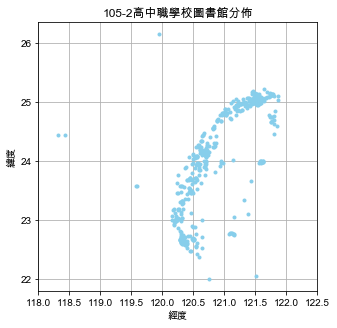

In [53]:
plt.figure(figsize=(5,4.95))
x=df_1052['Enumeration_unit_long']
y=df_1052['Enumeration_unit_lat']
plt.xlabel('經度')
plt.ylabel('緯度')
plt.title('105-2高中職學校圖書館分佈')
plt.plot(x, y,'.', linewidth=5, color='skyblue')
plt.xlim([118,122.5])  
#plt.ylim([21,26])
plt.grid(True)
#plt.savefig('11.png', format='png',transparent=True)
plt.show()

In [6]:
df_1052hig=df_1052[df_1052['學校類別']=='高中']
df_1002hig=df_1002[df_1002['學校類別']=='高中']
df_952hig=df_952[df_952['學校類別']=='高中']
shape(df_1052hig)#有350間高中
shape(df_1002hig)#有338間高中
shape(df_952hig)#有284間高中

df_1052hi=df_1052[df_1052['學校類別']=='高職']
df_1002hi=df_1002[df_1002['學校類別']=='高職']
df_952hi=df_952[df_952['學校類別']=='高職']
shape(df_1052hi) #有152間高職
shape(df_1002hi) #有153間高職
shape(df_952hi) #有137間高職

df_1052h=df_1052[df_1052['學校類別']=='特殊']
df_1002h=df_1002[df_1002['學校類別']=='特殊']
df_952h=df_952[df_952['學校類別']=='特殊']
shape(df_1052h) #有27間特殊學校
shape(df_1002h) #有24間特殊學校
shape(df_952h) #有15間特殊學校

(15, 44)

# 比較105-2高中、高職、特殊學校的平均值

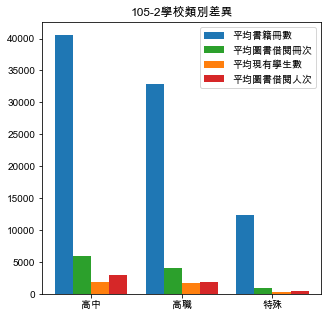

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
labels = ['高中', '高職', '特殊']
book_means = [sum(df_1052hig['書籍冊數'])/350, sum(df_1052hi['書籍冊數'])/152,sum(df_1052h['書籍冊數'])/27]
people_means = [sum(df_1052hig['現有學生數'])/350, sum(df_1052hi['現有學生數'])/152,sum(df_1052h['現有學生數'])/27]
borrow_means = [sum(df_1052hig['圖書借閱冊次'])/350, sum(df_1052hi['圖書借閱冊次'])/152,sum(df_1052h['圖書借閱冊次'])/27]
borpeople_means=[sum(df_1052hig['圖書借閱人次'])/350, sum(df_1052hi['圖書借閱人次'])/152,sum(df_1052h['圖書借閱人次'])/27]
ind = np.arange(3)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, book_means, width, bottom=0)
p3 = ax.bar(ind + 2*width, people_means, width, bottom=0)
p2 = ax.bar(ind + width, borrow_means, width, bottom=0)
p4 = ax.bar(ind + 3*width, borpeople_means, width, bottom=0)
ax.set_title('105-2學校類別差異')
ax.set_xticks(ind + 3*width / 2)
ax.set_xticklabels(('高中', '高職', '特殊'))
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('平均書籍冊數','平均圖書借閱冊次', '平均現有學生數','平均圖書借閱人次' ))
ax.autoscale_view()

# 比較105-2  100-2  95-2 的平均值 

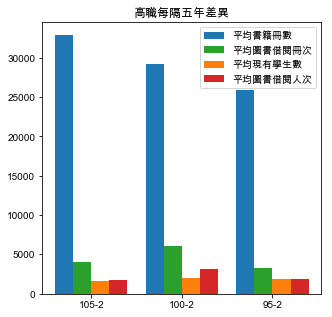

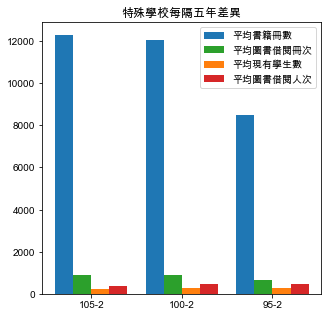

In [9]:
# fig, ax = plt.subplots(figsize=(5,5))
labels = ['105-2', '100-2', '95-2']
book_means = [sum(df_1052hig['書籍冊數'])/350, sum(df_1002hig['書籍冊數'])/338,sum(df_952hig['書籍冊數'])/284]
people_means = [sum(df_1052hig['現有學生數'])/350, sum(df_1002hig['現有學生數'])/338,sum(df_952hig['現有學生數'])/284]
borrow_means = [sum(df_1052hig['圖書借閱冊次'])/350, sum(df_1002hig['圖書借閱冊次'])/338,sum(df_952hig['圖書借閱冊次'])/284]
borpeople_means=[sum(df_1052hig['圖書借閱人次'])/350, sum(df_1002hig['圖書借閱人次'])/338,sum(df_952hig['圖書借閱人次'])/284]
ind = np.arange(3)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, book_means, width, bottom=0)
p3 = ax.bar(ind + 2*width, people_means, width, bottom=0)
p2 = ax.bar(ind + width, borrow_means, width, bottom=0)
p4 = ax.bar(ind + 3*width, borpeople_means, width, bottom=0)
ax.set_title('高中每隔五年差異')
ax.set_xticks(ind + 3*width / 2)
ax.set_xticklabels(('105-2', '100-2', '95-2'))
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('平均書籍冊數','平均圖書借閱冊次', '平均現有學生數','平均圖書借閱人次' ))
#ax.autoscale_view()

#---------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
labels = ['105-2', '100-2', '95-2']
book_means = [sum(df_1052hi['書籍冊數'])/152, sum(df_1002hi['書籍冊數'])/153,sum(df_952hi['書籍冊數'])/137]
people_means = [sum(df_1052hi['現有學生數'])/152, sum(df_1002hi['現有學生數'])/153,sum(df_952hi['現有學生數'])/137]
borrow_means = [sum(df_1052hi['圖書借閱冊次'])/152, sum(df_1002hi['圖書借閱冊次'])/153,sum(df_952hi['圖書借閱冊次'])/137]
borpeople_means=[sum(df_1052hi['圖書借閱人次'])/152, sum(df_1002hi['圖書借閱人次'])/153,sum(df_952hi['圖書借閱人次'])/137]
ind = np.arange(3)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, book_means, width, bottom=0)
p3 = ax.bar(ind + 2*width, people_means, width, bottom=0)
p2 = ax.bar(ind + width, borrow_means, width, bottom=0)
p4 = ax.bar(ind + 3*width, borpeople_means, width, bottom=0)
ax.set_title('高職每隔五年差異')
ax.set_xticks(ind + 3*width / 2)
ax.set_xticklabels(('105-2', '100-2', '95-2'))
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('平均書籍冊數','平均圖書借閱冊次', '平均現有學生數','平均圖書借閱人次' ))

#---------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
labels = ['105-2', '100-2', '95-2']
book_means = [sum(df_1052h['書籍冊數'])/27, sum(df_1002h['書籍冊數'])/24,sum(df_952h['書籍冊數'])/15]
people_means = [sum(df_1052h['現有學生數'])/27, sum(df_1002h['現有學生數'])/24,sum(df_952h['現有學生數'])/15]
borrow_means = [sum(df_1052h['圖書借閱冊次'])/27, sum(df_1002h['圖書借閱冊次'])/24,sum(df_952h['圖書借閱冊次'])/15]
borpeople_means=[sum(df_1052h['圖書借閱人次'])/27, sum(df_1002h['圖書借閱人次'])/24,sum(df_952h['圖書借閱人次'])/15]
ind = np.arange(3)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, book_means, width, bottom=0)
p3 = ax.bar(ind + 2*width, people_means, width, bottom=0)
p2 = ax.bar(ind + width, borrow_means, width, bottom=0)
p4 = ax.bar(ind + 3*width, borpeople_means, width, bottom=0)
ax.set_title('特殊學校每隔五年差異')
ax.set_xticks(ind + 3*width / 2)
ax.set_xticklabels(('105-2', '100-2', '95-2'))
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('平均書籍冊數','平均圖書借閱冊次', '平均現有學生數','平均圖書借閱人次' ))

ax.autoscale_view()

# 人均借閱冊數

不確定這樣的算法是否正確

『高中』

In [42]:
a1=sum(df_1052hig['圖書借閱冊次'])/sum(df_1052hig['現有學生數'])
a2=sum(df_1002hig['圖書借閱冊次'])/sum(df_1002hig['現有學生數'])
a3=sum(df_952hig['圖書借閱冊次'])/sum(df_952hig['現有學生數'])

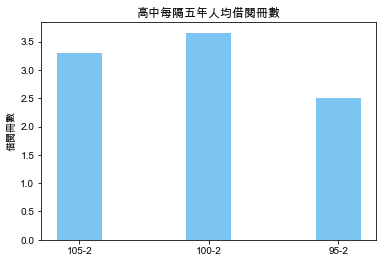

In [44]:
N = 3
stuent_borrow_avg = [a1, a2, a3]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('高中每隔五年人均借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'lightskyblue',lw=1)

plt.show()

『高職』

In [49]:
b1=sum(df_1052hi['圖書借閱冊次'])/sum(df_1052hi['現有學生數'])
b2=sum(df_1002hi['圖書借閱冊次'])/sum(df_1002hi['現有學生數'])
b3=sum(df_952hi['圖書借閱冊次'])/sum(df_952hi['現有學生數'])

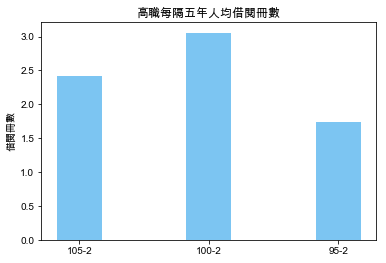

In [50]:
N = 3
stuent_borrow_avg = [b1, b2, b3]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('高職每隔五年人均借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'lightskyblue',lw=1)
plt.show()

『特殊學校』

In [51]:
c1=sum(df_1052h['圖書借閱冊次'])/sum(df_1052h['現有學生數'])
c2=sum(df_1002h['圖書借閱冊次'])/sum(df_1002h['現有學生數'])
c3=sum(df_952h['圖書借閱冊次'])/sum(df_952h['現有學生數'])

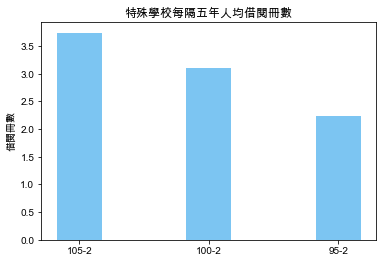

In [52]:
N = 3
stuent_borrow_avg = [c1, c2, c3]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('特殊學校每隔五年人均借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'lightskyblue',lw=1)
plt.show()

# 平均每次借閱冊數

不確定這樣的算法是否正確

『高中』

In [54]:
a11=sum(df_1052hig['圖書借閱冊次'])/sum(df_1052hig['圖書借閱人次'])
a22=sum(df_1002hig['圖書借閱冊次'])/sum(df_1002hig['圖書借閱人次'])
a33=sum(df_952hig['圖書借閱冊次'])/sum(df_952hig['圖書借閱人次'])

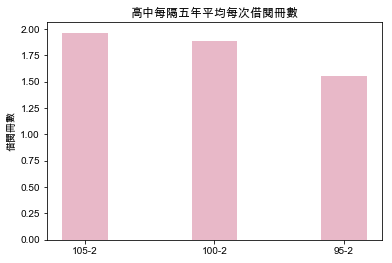

In [63]:
N = 3
stuent_borrow_avg = [a11, a22, a33]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('高中每隔五年平均每次借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'pink',lw=1)

plt.show()

『高職』

In [59]:
b11=sum(df_1052hi['圖書借閱冊次'])/sum(df_1052hi['圖書借閱人次'])
b22=sum(df_1002hi['圖書借閱冊次'])/sum(df_1002hi['圖書借閱人次'])
b33=sum(df_952hi['圖書借閱冊次'])/sum(df_952hi['圖書借閱人次'])

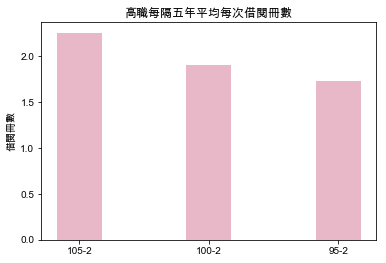

In [62]:
N = 3
stuent_borrow_avg = [b11, b22, b33]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('高職每隔五年平均每次借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'pink',lw=1)
plt.show()

『特殊學校』

In [64]:
c11=sum(df_1052h['圖書借閱冊次'])/sum(df_1052h['圖書借閱人次'])
c22=sum(df_1002h['圖書借閱冊次'])/sum(df_1002h['圖書借閱人次'])
c33=sum(df_952h['圖書借閱冊次'])/sum(df_952h['圖書借閱人次'])

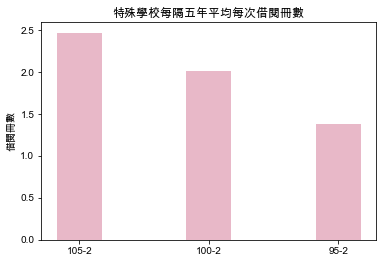

In [65]:
N = 3
stuent_borrow_avg = [c11, c22, c33]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, stuent_borrow_avg, width)

plt.ylabel('借閱冊數')
plt.title('特殊學校每隔五年平均每次借閱冊數')
X=['105-2', '100-2', '95-2']

plt.bar(X, stuent_borrow_avg, alpha=0.9, width = 0.35, facecolor = 'pink',lw=1)
plt.show()